In [1]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

import numpy as np
import os

In [2]:
from GeoGuessrDataset import GeoGuessrDataset, ToTensor
%load_ext autoreload
%autoreload 2

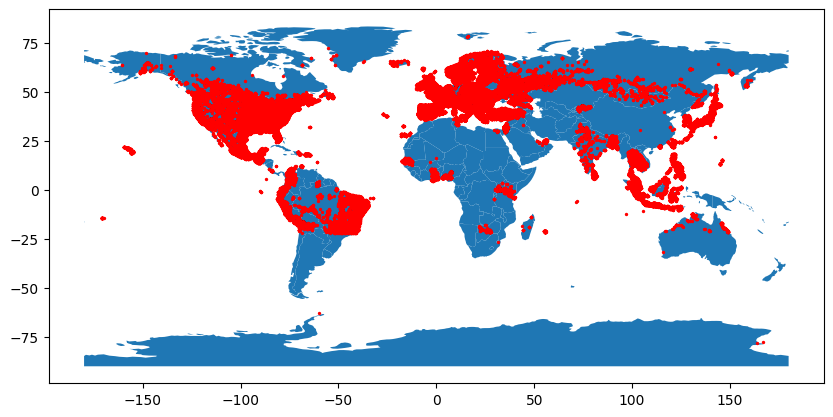

In [3]:
df = pd.read_csv("coordinates.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 6)), marker='o', color='red', markersize=2);

In [5]:
import pygeohash as phg

# We want a geohash precsion of 3 so that we get approximately 32768 cells, which will represent our classes.
df['geohash']=df.apply(lambda coords: phg.encode(coords.latitude, coords.longitude, precision=3), axis=1)


In [6]:

def geohash_to_decimal(geohash):
    base_32 = '0123456789bcdefghjkmnpqrstuvwxyz';
    geohash = geohash.lower()
    return sum([32**idx * base_32.index(char) for idx, char in enumerate(geohash[::-1])])
    
geohash_to_decimal("ezs42")
print(geohash_to_decimal('ezs'))
# 14672002
print(geohash_to_decimal('DRUGGED'))
# 13684424108
print(geohash_to_decimal('ZUR1CH'))
# 1068205424
print(geohash_to_decimal('6'))

14328
13684424108
1068205424
6


In [7]:
df.head()

,filename,latitude,longitude,geometry,geohash
0,"img_-0.00010815079440362751,-51.08998107910156...",-0.000108,-51.089981,POINT (-51.08998 -0.00011),6zg
1,"img_-0.002093230839818716,109.30863952636719.jpg",-0.002093,109.308640,POINT (109.30864 -0.00209),qrv
2,"img_-0.0021491367369890213,-78.45559692382812.jpg",-0.002149,-78.455597,POINT (-78.45560 -0.00215),6rb
3,"img_-0.0023839406203478575,-78.45580291748047.jpg",-0.002384,-78.455803,POINT (-78.45580 -0.00238),6rb
4,"img_-0.0036043361760675907,36.88760757446289.jpg",-0.003604,36.887608,POINT (36.88761 -0.00360),kzf


In [8]:
df['geohash_decimal']=df.apply(lambda x: geohash_to_decimal(x["geohash"]) ,axis=1)
df.head()

,filename,latitude,longitude,geometry,geohash,geohash_decimal
0,"img_-0.00010815079440362751,-51.08998107910156...",-0.000108,-51.089981,POINT (-51.08998 -0.00011),6zg,7151
1,"img_-0.002093230839818716,109.30863952636719.jpg",-0.002093,109.308640,POINT (109.30864 -0.00209),qrv,23291
2,"img_-0.0021491367369890213,-78.45559692382812.jpg",-0.002149,-78.455597,POINT (-78.45560 -0.00215),6rb,6890
3,"img_-0.0023839406203478575,-78.45580291748047.jpg",-0.002384,-78.455803,POINT (-78.45580 -0.00238),6rb,6890
4,"img_-0.0036043361760675907,36.88760757446289.jpg",-0.003604,36.887608,POINT (36.88761 -0.00360),kzf,19438


In [9]:
# Sanity check: Max value should not be higher than 32768
print(df["geohash_decimal"].max())


32132


<AxesSubplot: ylabel='Frequency'>

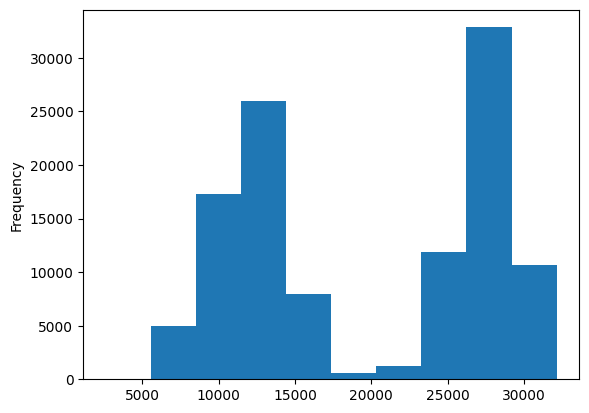

In [10]:
df["geohash_decimal"].plot.hist()

In [11]:
df[["filename", "latitude","longitude", "geohash_decimal"]].to_csv("coordinates_geohash.csv", index=False)

In [13]:
from GeoGuessrDataset import GeoGuessrDataset

root_dir = r"C:\Users\Shadow\Pictures\Geogussr\Projekt"

geoguessr_dataset = GeoGuessrDataset(csv_file='./coordinates_geohash.csv',
                                    root_dir=root_dir, transform=ToTensor())

for i in range(10):
    sample = geoguessr_dataset[i]
    plt.imshow(sample["image"].permute(1, 2, 0))
    print(i, sample['image'].shape, sample['geohash'])


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [17]:
import torch
import torch.nn.functional as F

F.one_hot(torch.tensor([2,3]), num_classes=5)

tensor([[0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0]])

In [12]:
arr = torch.arange(12)
print(arr)
print(arr.view(2,2,-1))
arr.view(2,2,-1).view(2, 6)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]]])


tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]])